# Laboratorium 1


### Konfiguracja

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [6]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


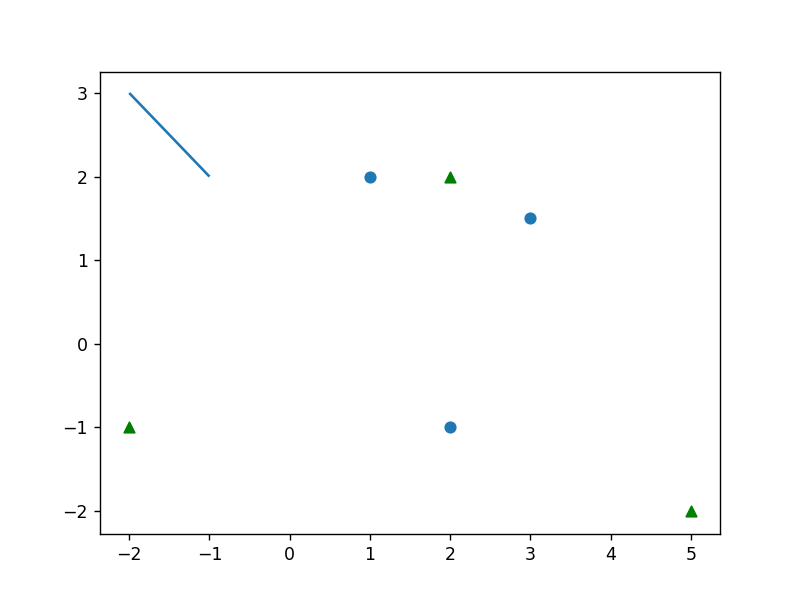

In [7]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

<IPython.core.display.Javascript object>


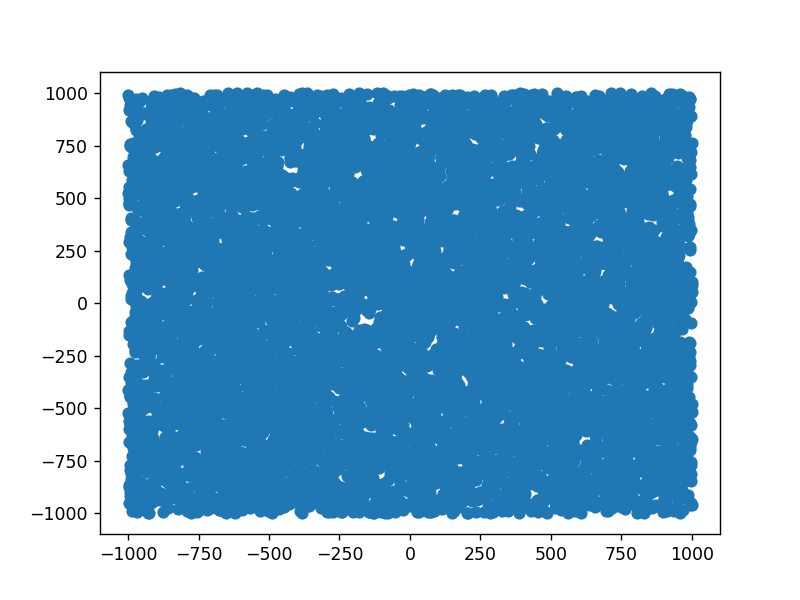

In [8]:
%matplotlib notebook

points1 = [(np.random.uniform(-1000,1000),np.random.uniform(-1000,1000)) for x in range(10000)]
plot1 = Plot([PointsCollection(points1)])
plot1.draw()


<IPython.core.display.Javascript object>


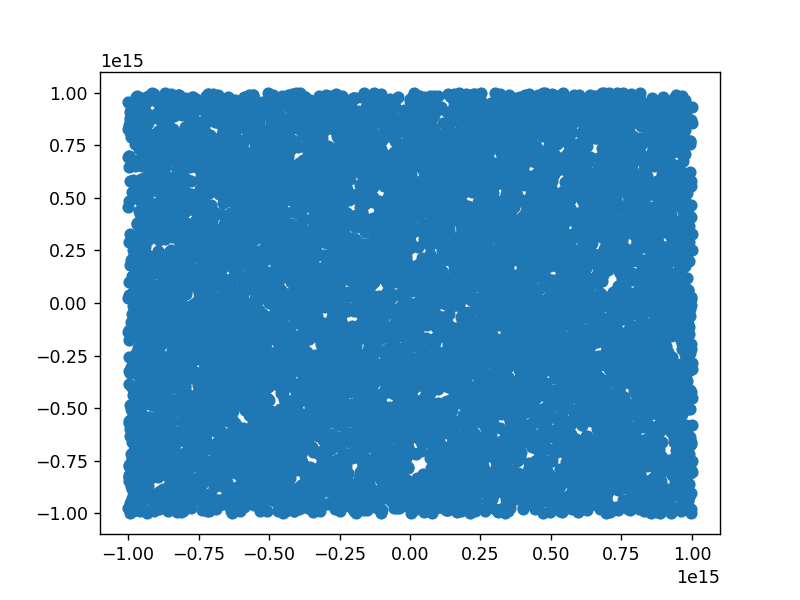

In [26]:
%matplotlib notebook
points2 = [(np.random.uniform(-10e14,10e14),np.random.uniform(-10e14,10e14)) for x in range(10000)]
plot2 = Plot([PointsCollection(points2)])
plot2.draw()


<IPython.core.display.Javascript object>


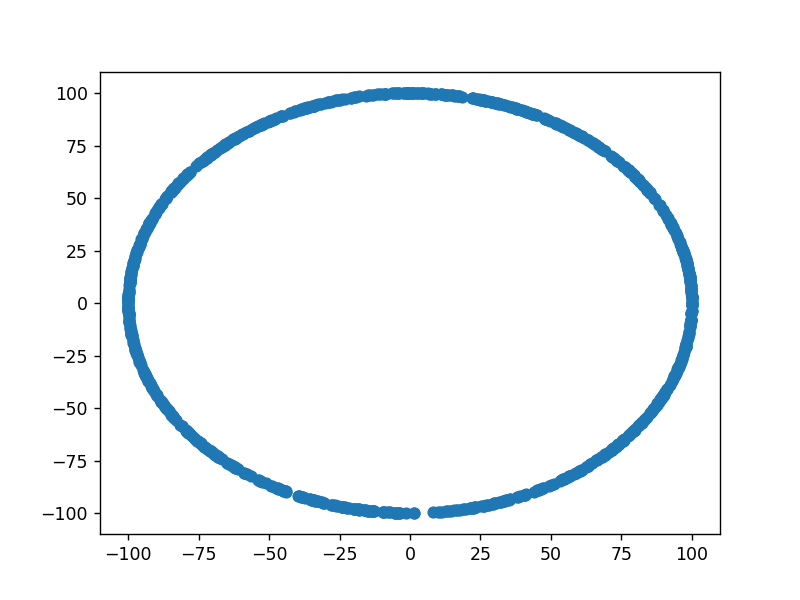

In [9]:
%matplotlib notebook
points3rand = np.random.uniform(0,4,1000)
points3 = [(100*np.sin((np.pi/2) * x),100*np.cos((np.pi/2)*x)) for x in points3rand]
plot3 = Plot([PointsCollection(points3)])
plot3.draw()

<IPython.core.display.Javascript object>


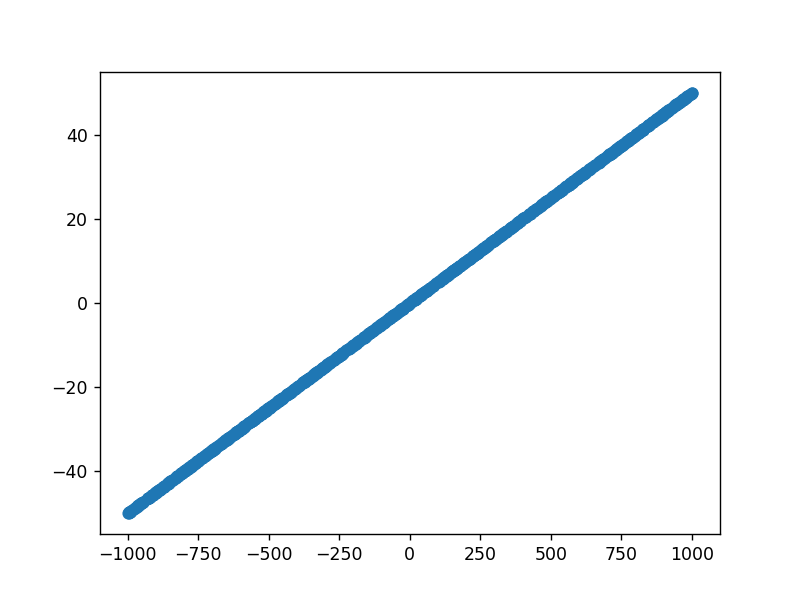

In [35]:
%matplotlib notebook
random4 = np.random.uniform(-1000,1000,1000)
points4= [(x,  0.05*x+0.05) for x in random4]
plot4 = Plot([PointsCollection(points4)])
plot4.draw()

In [10]:
def determiner1(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - a[0]*c[1] - a[1]*b[0] - b[1]*c[0]

def determiner2(a,b,c):
    return (a[0]-c[0]) * (b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])

def npDet1(a,b,c):
    return np.linalg.det([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])

def npDet2(a,b,c):
    return np.linalg.det([[a[0]-c[0],a[1]-c[1]],[b[0]-c[0],b[1]-c[1]]])


print(determiner1((1,1),(2,2),(2,3)))
print(determiner2((1,1),(2,2),(2,3)))

print(npDet1((1,1),(2,2),(2,3)))
print(npDet2((1,1),(2,2),(2,3)))

1
1
1.0
1.0


In [11]:
def classificatedet(a, b, determiner, epsilon, points):
    pointsLeft = []
    pointsRight = []
    pointsOnLine = []
    for x in points:
        if(abs(determiner(a,b,x)) < epsilon):pointsOnLine.append(x)
        elif(determiner(a,b,x) > 0): pointsLeft.append(x)
        elif (determiner(a,b,x) < 0): pointsRight.append(x)
    return (pointsLeft,pointsOnLine,pointsRight)



In [70]:
def compareTwoDeterminers(a, b, det1, det2, epsilon, points):
    pointsLeft = [[] for x in range (2)]
    pointsRight = [[] for x in range (2)]
    pointsOnLine = [[] for x in range (2)]
    pointsLeft[0], pointsOnLine[0], pointsRight[0] = classificatedet(a, b, det1, epsilon, points)
    pointsLeft[1], pointsOnLine[1], pointsRight[1] = classificatedet(a, b, det2, epsilon, points)
    
    print("Wyznacznik 1 : na lewo = %d, na linii = %d, na prawo = %d" % (len(pointsLeft[0]), len(pointsOnLine[0]), len(pointsRight[0])))
    print("Wyznacznik 2 : na lewo = %d, na linii = %d, na prawo = %d" % (len(pointsLeft[1]), len(pointsOnLine[1]), len(pointsRight[1])))
    
    badpoints = []
    for x in pointsLeft[0]:
        if x not in pointsLeft[1]:
            badpoints.append(x)
    for x in pointsRight[0]:
        if x not in pointsRight[1]:
            badpoints.append(x)
    for x in pointsOnLine[0]:
        if x not in pointsOnLine[1]:
            badpoints.append(x)
    return badpoints    

In [ ]:
# testy dla każdego zbioru dla dwóch różnych epsilonów 10^-6 i 10^-14 dla każdego wyznacznika

In [ ]:
#testy dla epsilona 10^-14

Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


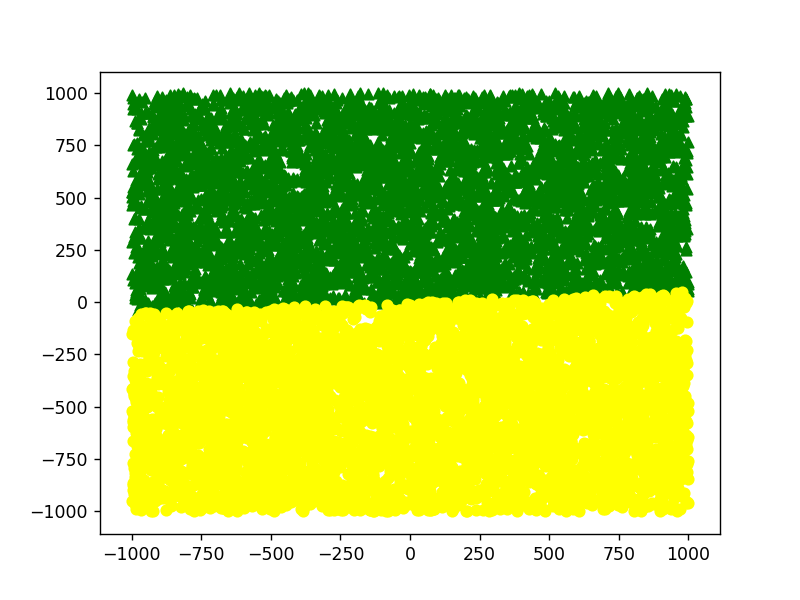

In [18]:
# testy dla zbioru 1
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-14,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()


Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


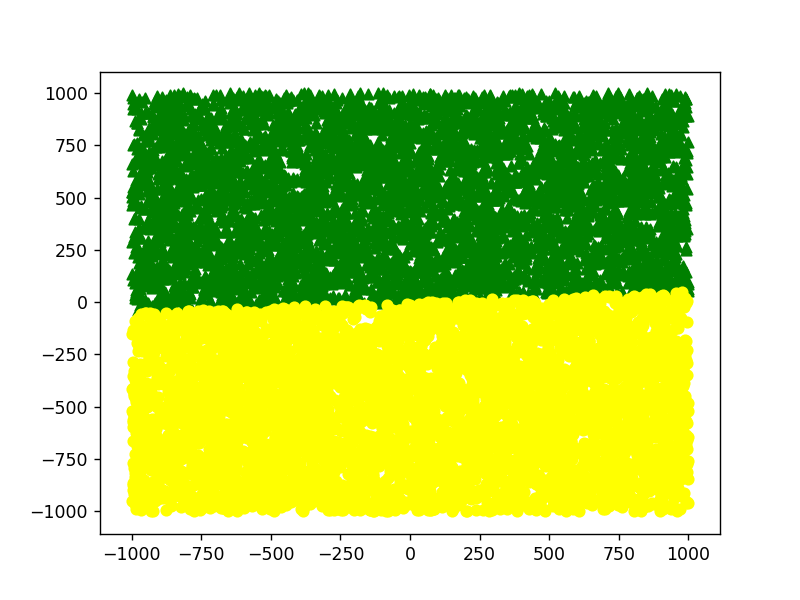

In [19]:
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-14,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


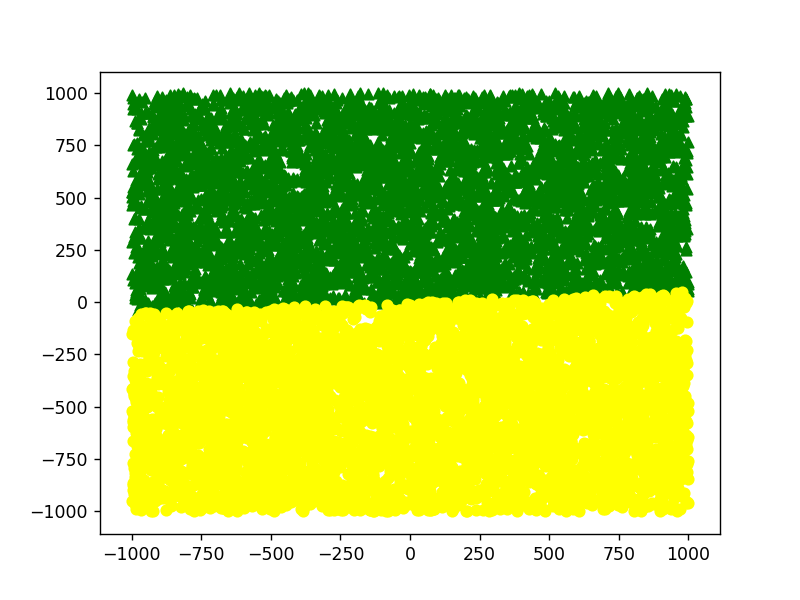

In [20]:
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-14,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


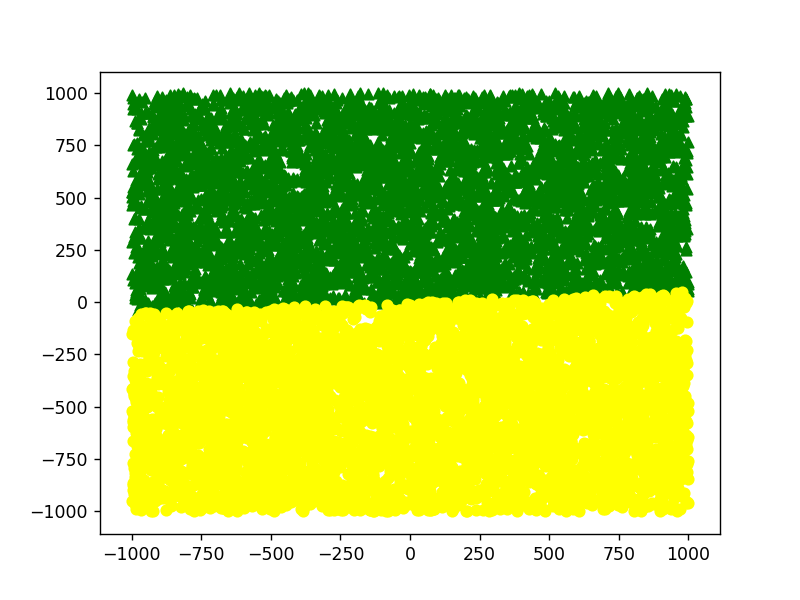

In [21]:
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),npDet2,10e-14,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4971
Punkty na linii: 0
Punkty na prawo: 5029


<IPython.core.display.Javascript object>


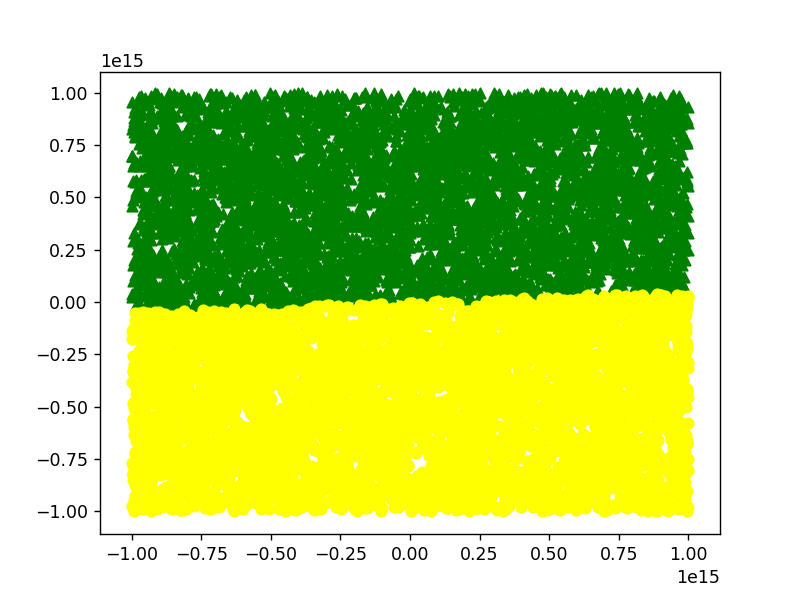

In [27]:
#wizuailzacja dla zbioru nr2
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-14,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4968
Punkty na linii: 8
Punkty na prawo: 5024


<IPython.core.display.Javascript object>


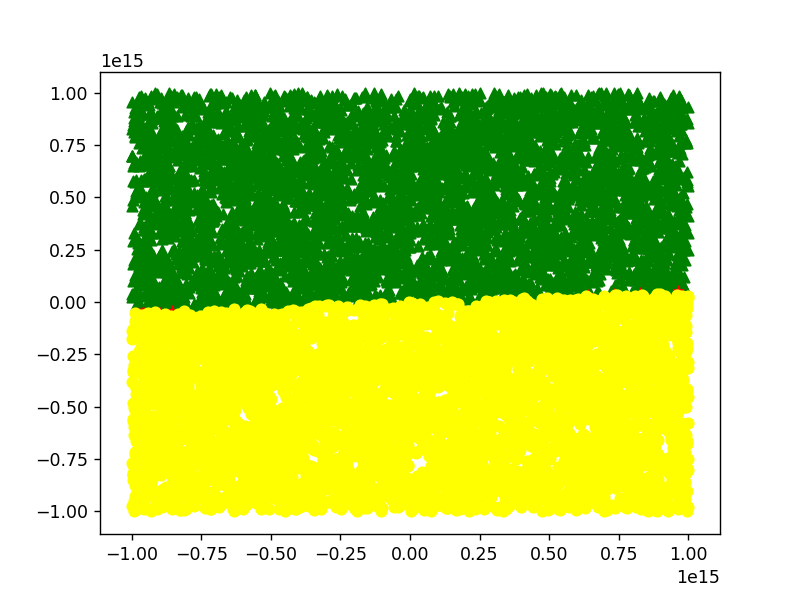

In [28]:
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-14,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4971
Punkty na linii: 0
Punkty na prawo: 5029


<IPython.core.display.Javascript object>


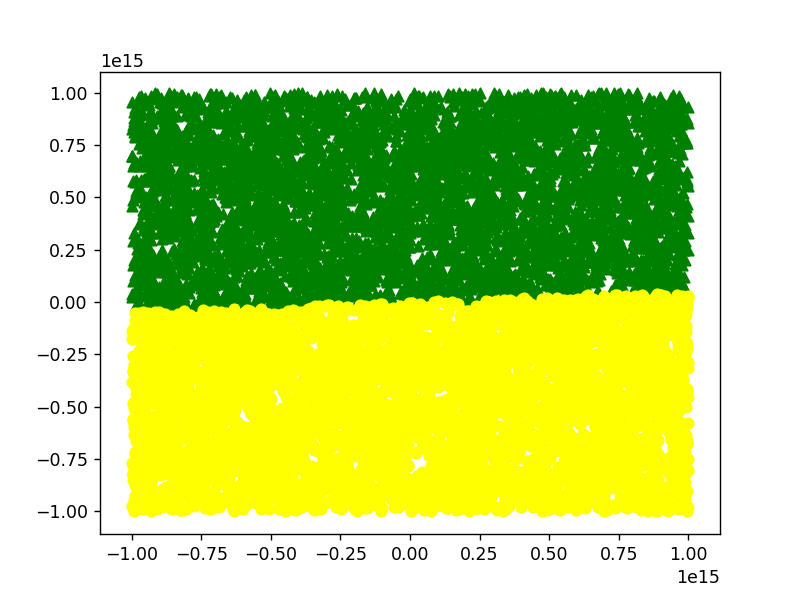

In [29]:
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-14,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4971
Punkty na linii: 0
Punkty na prawo: 5029


<IPython.core.display.Javascript object>


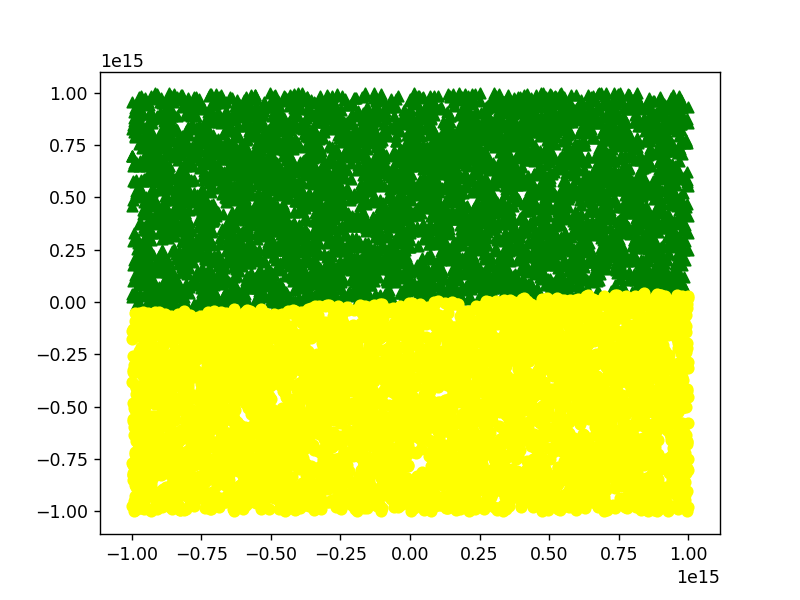

In [30]:
%matplotlib notebook
left, line, right = classificatedet((-1,0),(1,0.1),npDet2,10e-14,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


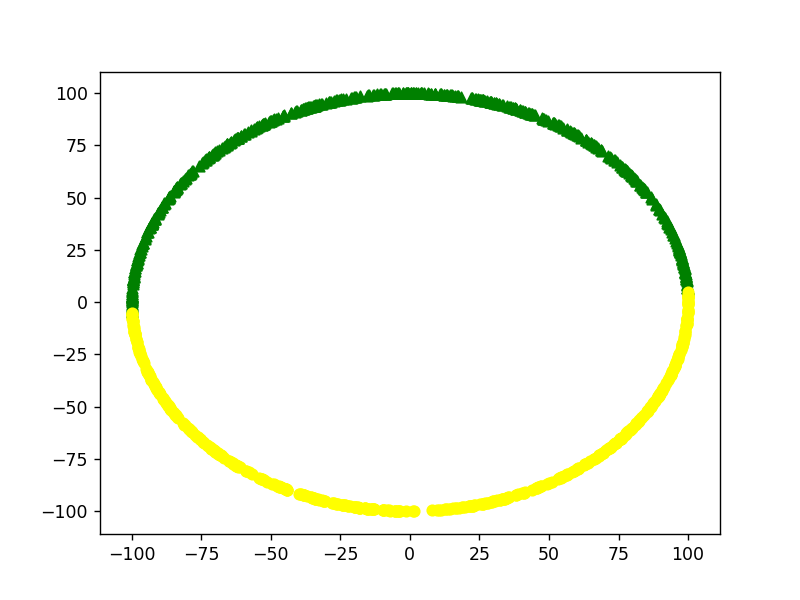

In [31]:
#wizualizacja dla okręgu
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-14,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()


Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


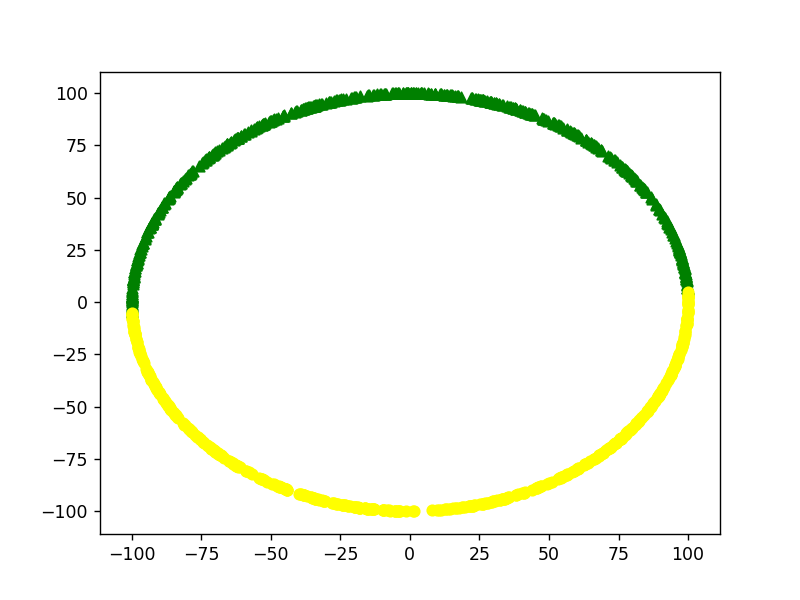

In [32]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-14,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


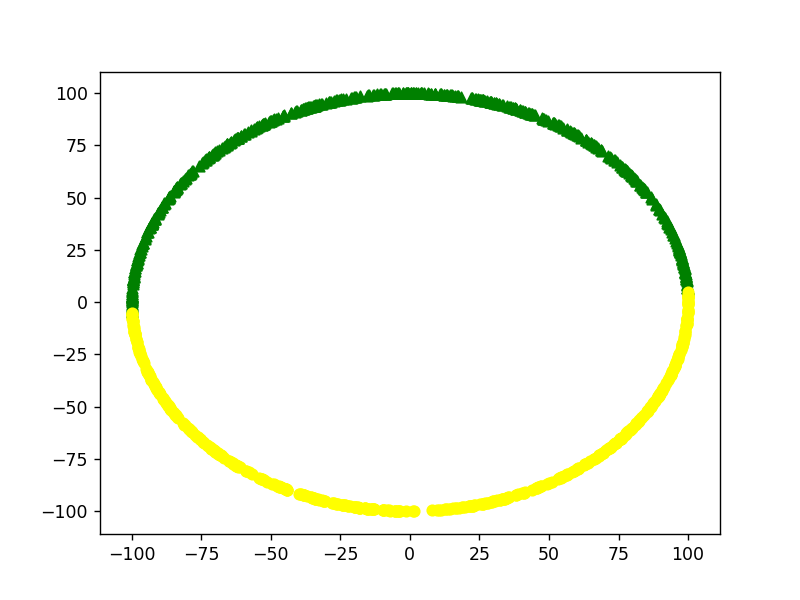

In [33]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-14,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


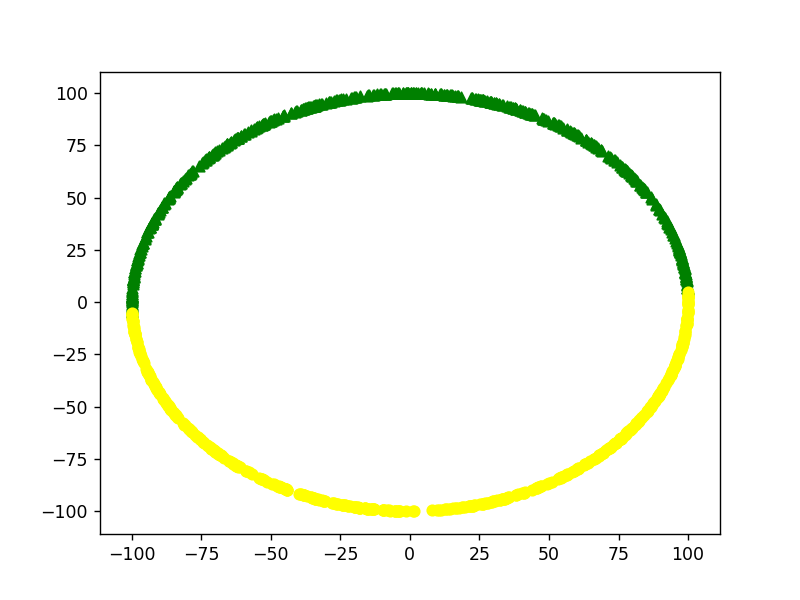

In [34]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1), npDet2,10e-14,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 0
Punkty na linii: 1000
Punkty na prawo: 0


<IPython.core.display.Javascript object>


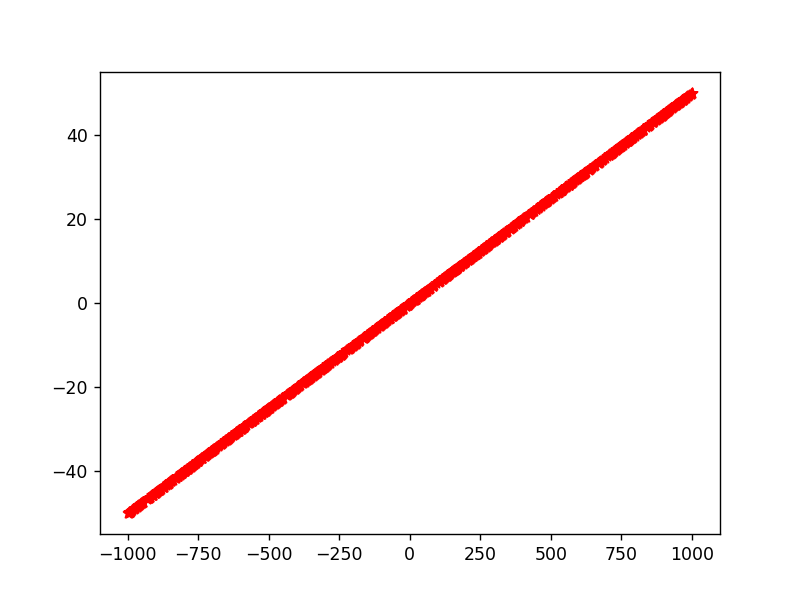

In [36]:
#wizualizacja dla punktów na linii
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-14,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 139
Punkty na linii: 739
Punkty na prawo: 122


<IPython.core.display.Javascript object>


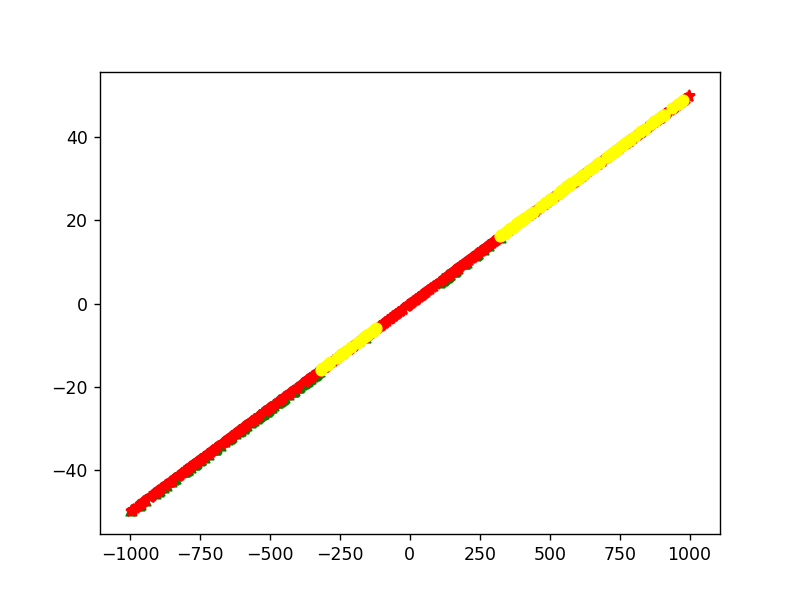

In [37]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-14,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 0
Punkty na linii: 1000
Punkty na prawo: 0


<IPython.core.display.Javascript object>


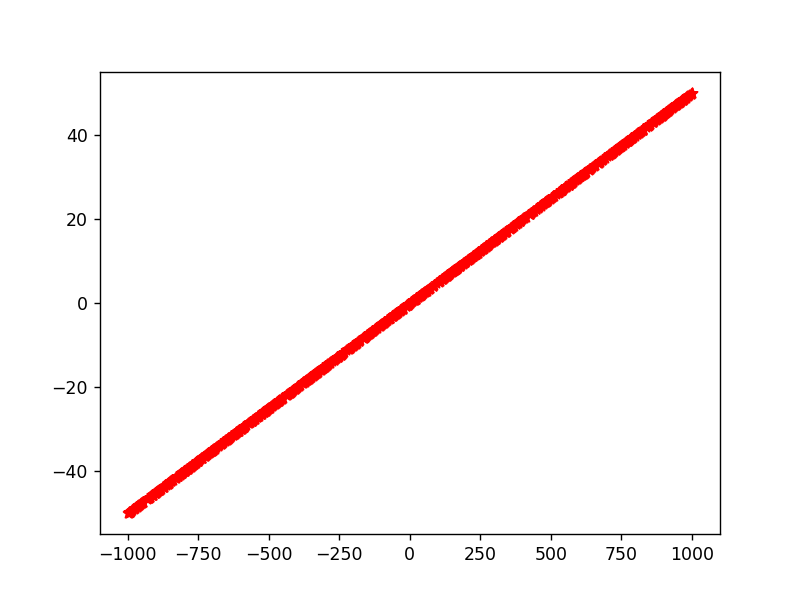

In [38]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-14,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 399
Punkty na linii: 273
Punkty na prawo: 328


<IPython.core.display.Javascript object>


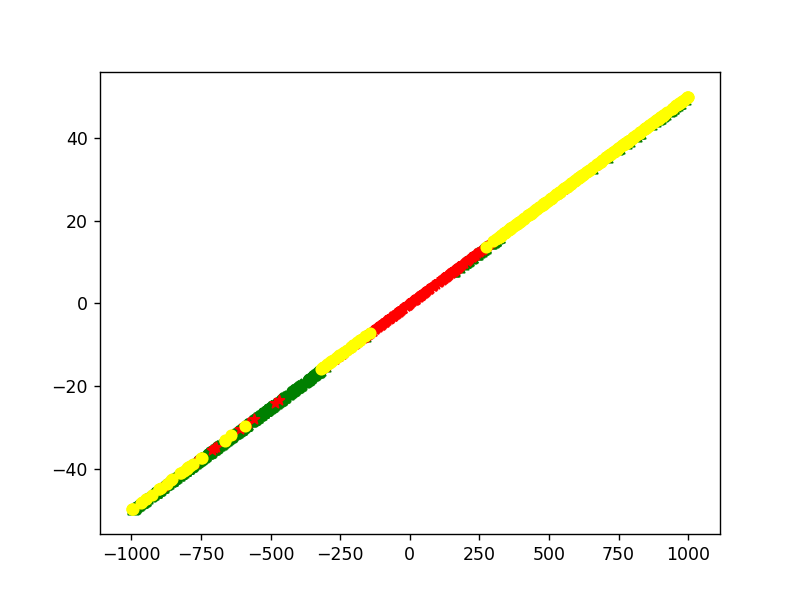

In [39]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet2,10e-14,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

In [ ]:
#testy dla epsilona 10^-6

Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


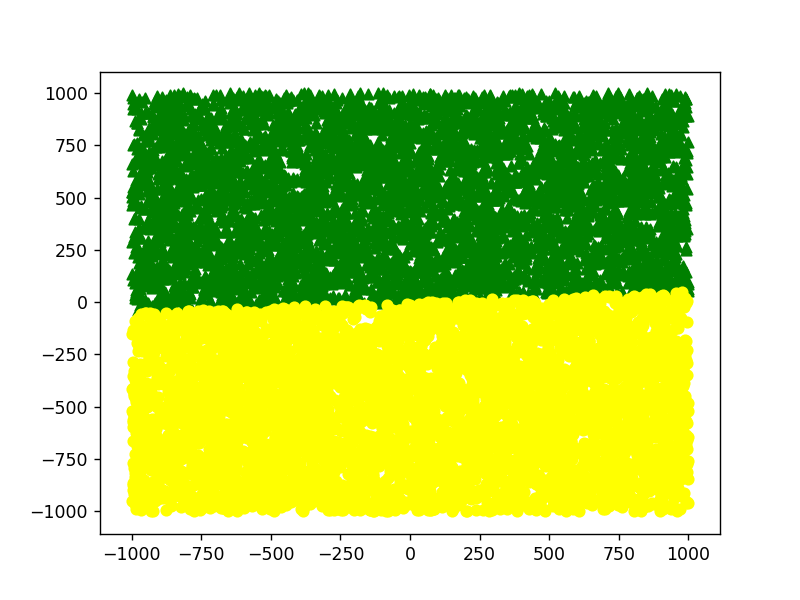

In [40]:
#testy dla pierwszego zbioru
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-6,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


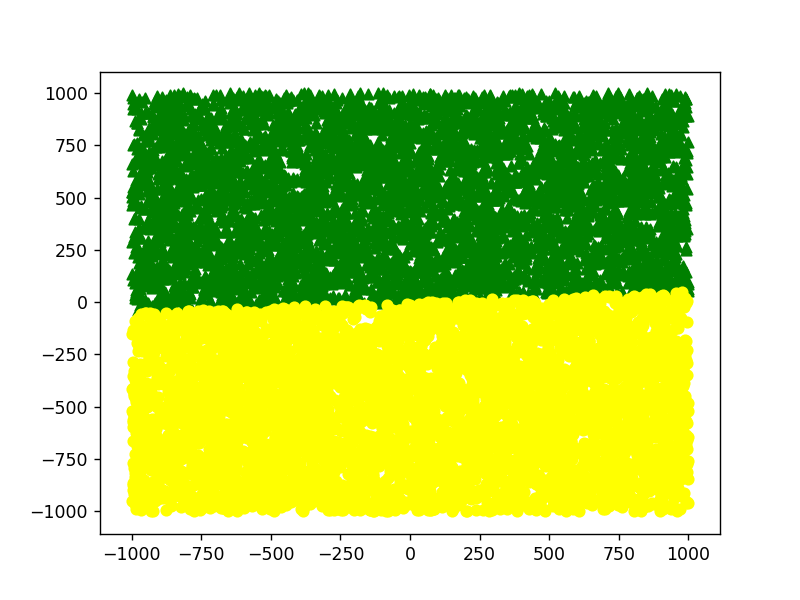

In [41]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-6,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


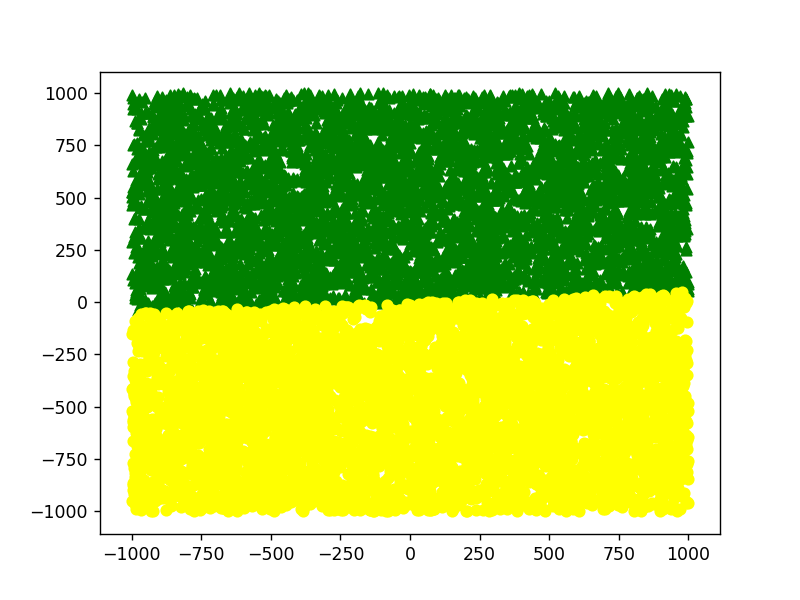

In [42]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-6,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4983
Punkty na linii: 0
Punkty na prawo: 5017


<IPython.core.display.Javascript object>


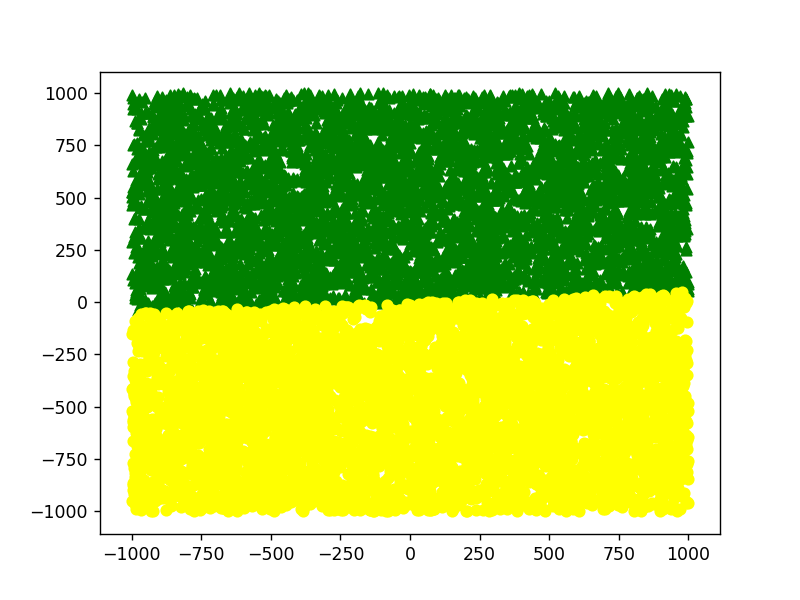

In [43]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet2,10e-6,points1)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4971
Punkty na linii: 0
Punkty na prawo: 5029


<IPython.core.display.Javascript object>


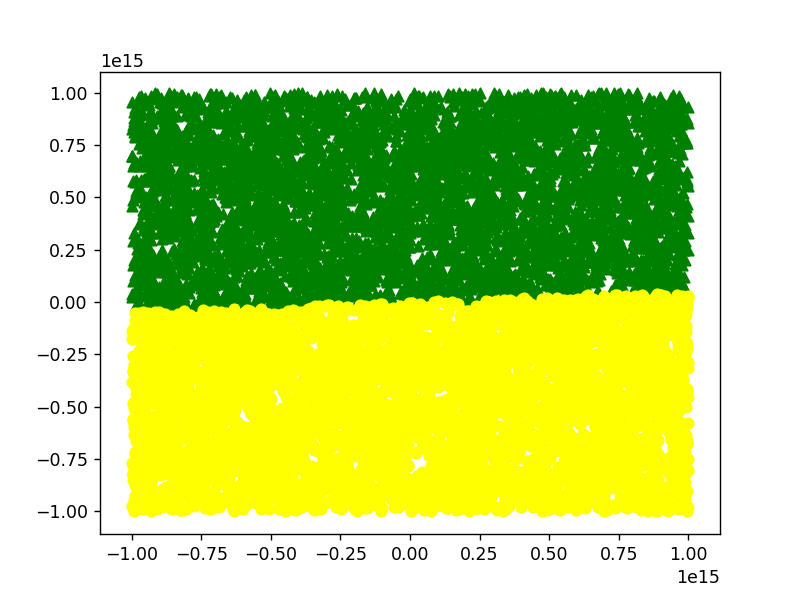

In [44]:
#testy dla drugiego zbioru
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-6,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4968
Punkty na linii: 8
Punkty na prawo: 5024


<IPython.core.display.Javascript object>


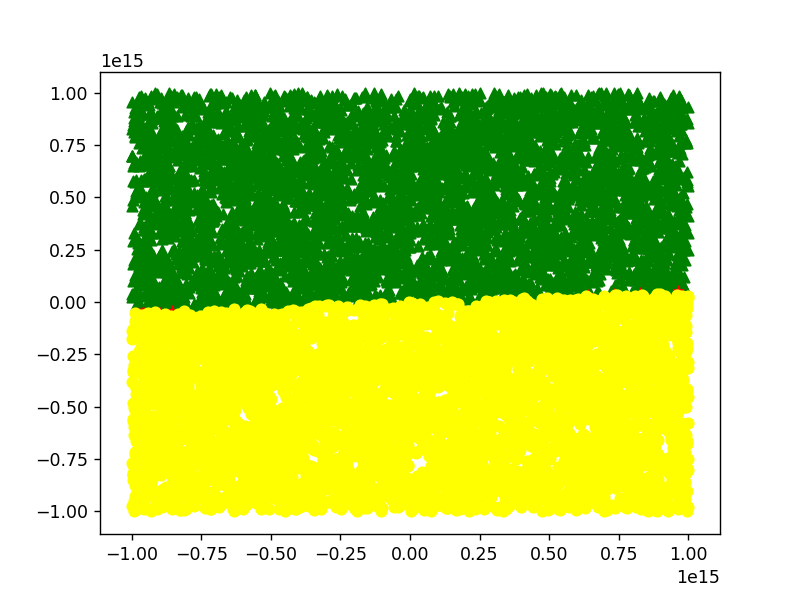

In [45]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-6,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4971
Punkty na linii: 0
Punkty na prawo: 5029


<IPython.core.display.Javascript object>


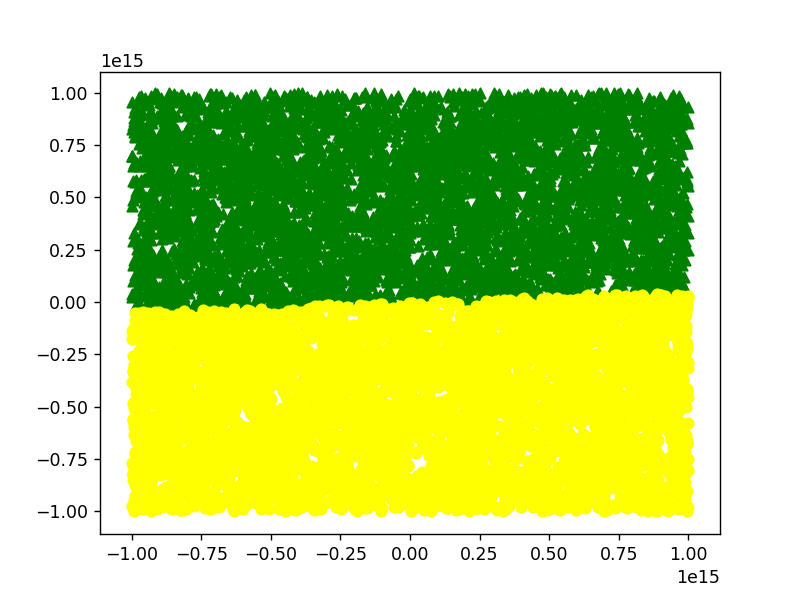

In [46]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-6,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 4971
Punkty na linii: 0
Punkty na prawo: 5029


<IPython.core.display.Javascript object>


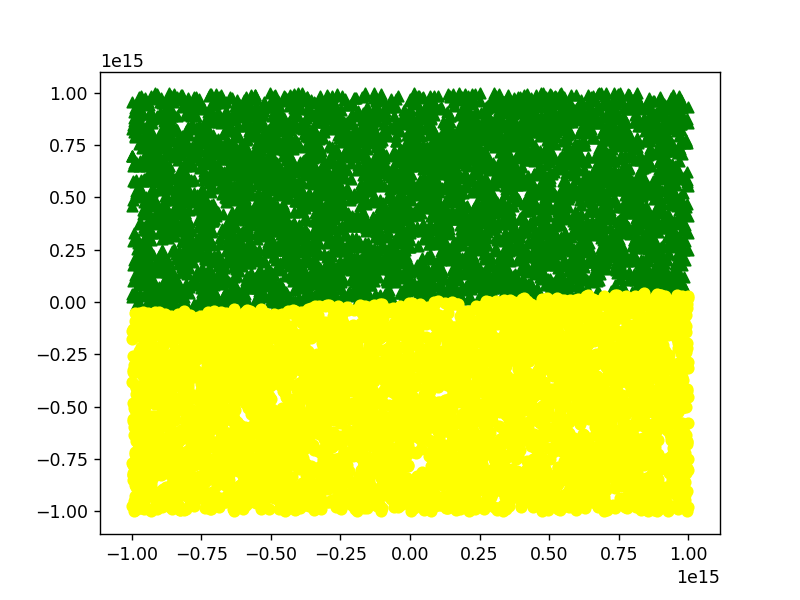

In [47]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet2,10e-6,points2)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


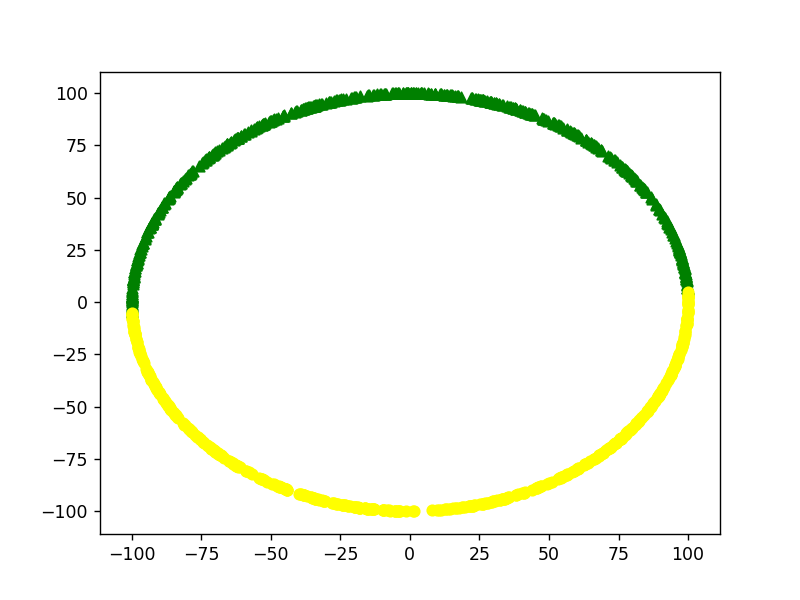

In [48]:
#testy dla punktów na okręgu
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-6,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


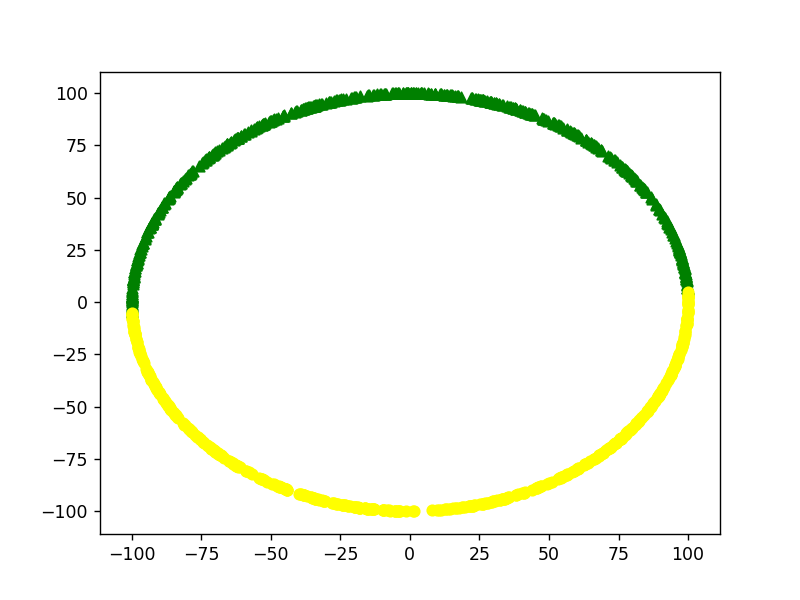

In [49]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-6,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


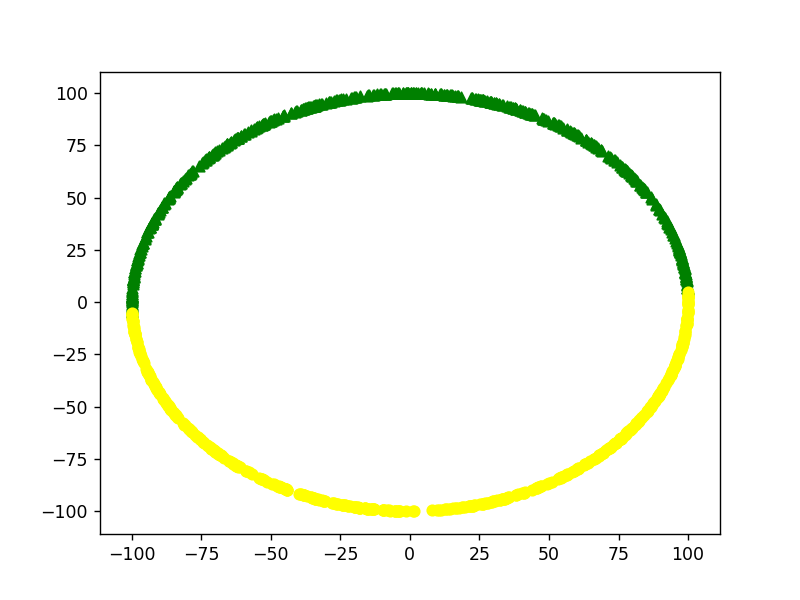

In [50]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-6,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 521
Punkty na linii: 0
Punkty na prawo: 479


<IPython.core.display.Javascript object>


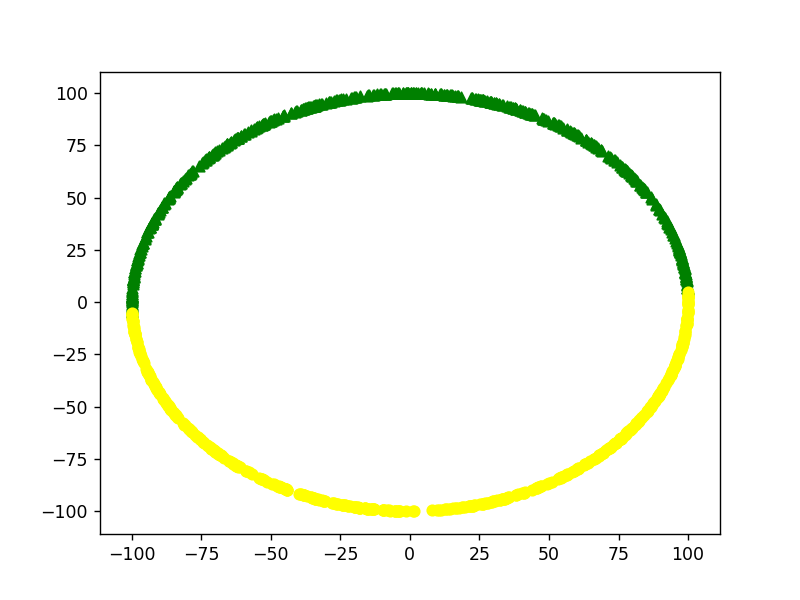

In [52]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet2,10e-6,points3)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 0
Punkty na linii: 1000
Punkty na prawo: 0


<IPython.core.display.Javascript object>


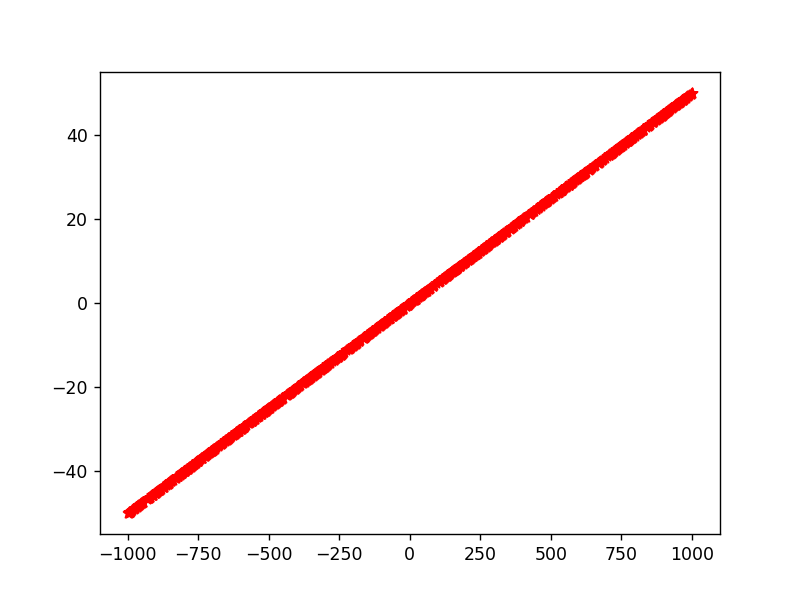

In [53]:
#wizualizacja dla punktów na linii
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner1,10e-6,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 0
Punkty na linii: 1000
Punkty na prawo: 0


<IPython.core.display.Javascript object>


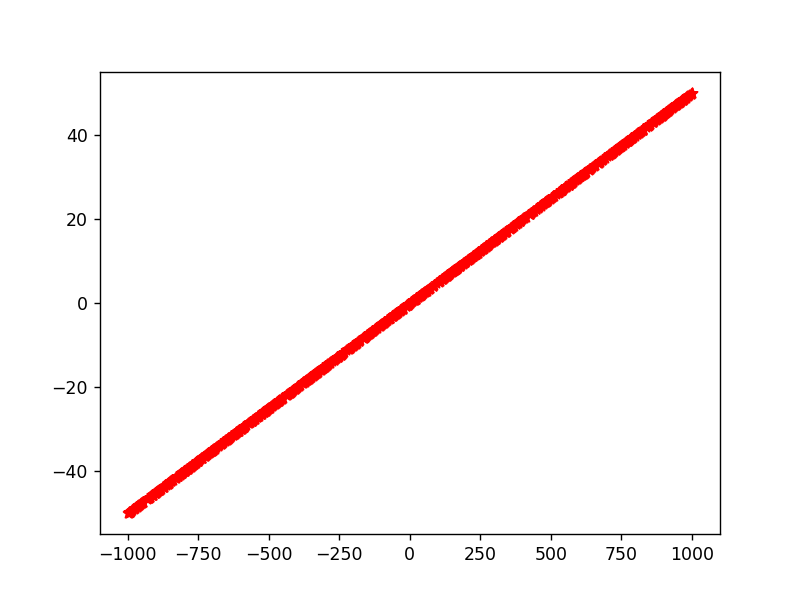

In [54]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),determiner2,10e-6,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 0
Punkty na linii: 1000
Punkty na prawo: 0


<IPython.core.display.Javascript object>


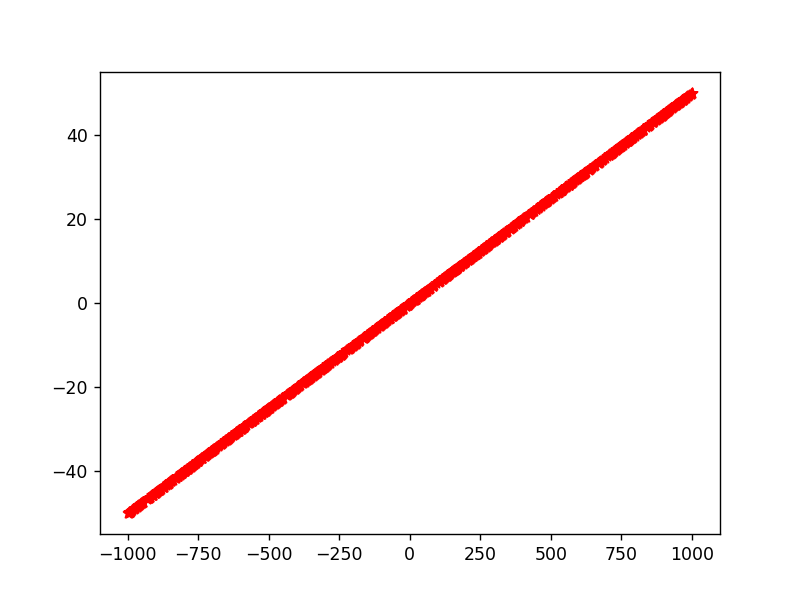

In [55]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet1,10e-6,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Punkty na lewo: 0
Punkty na linii: 1000
Punkty na prawo: 0


<IPython.core.display.Javascript object>


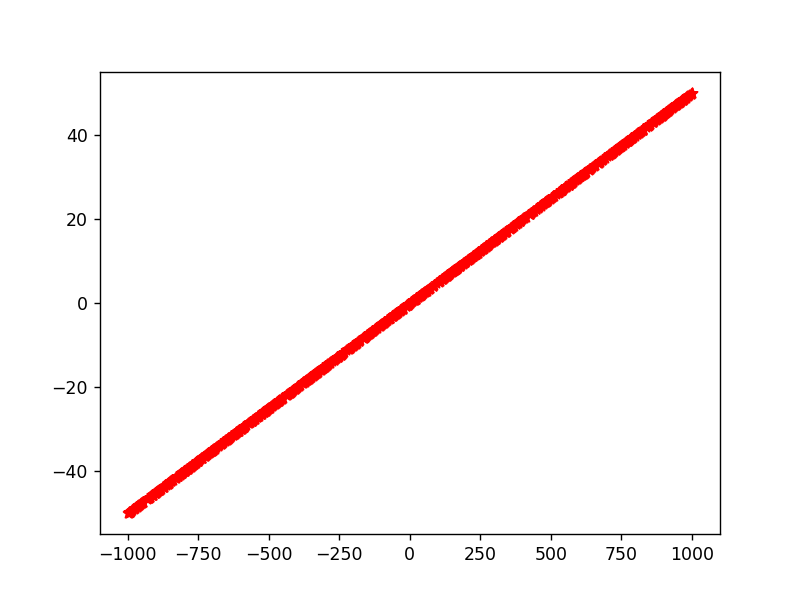

In [56]:
%matplotlib notebook

left, line, right = classificatedet((-1,0),(1,0.1),npDet2,10e-6,points4)
print("Punkty na lewo: %d" % (len(left)))
print("Punkty na linii: %d" % (len(line)))
print("Punkty na prawo: %d" % (len(right)))
plotclass = Plot([PointsCollection(left,color = 'green', marker = "^"),PointsCollection(line, color = 'red', marker = "*"),PointsCollection(right, color = 'yellow')])
plotclass.draw()

Wyznacznik 1 : na lewo = 139, na linii = 739, na prawo = 122
Wyznacznik 2 : na lewo = 0, na linii = 1000, na prawo = 0
261


<IPython.core.display.Javascript object>


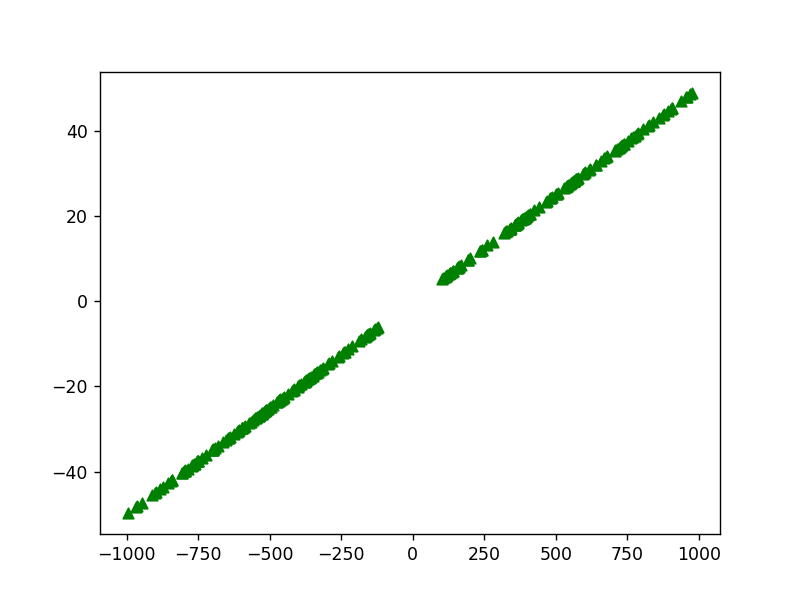

In [74]:
#testy dla wyznacznika wlasneg 2 i 1 epsilon 10^-14
badPoints = compareTwoDeterminers((-1,0),(1,0.1),determiner2,determiner1,10e-14,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

Wyznacznik 1 : na lewo = 0, na linii = 1000, na prawo = 0
Wyznacznik 2 : na lewo = 0, na linii = 1000, na prawo = 0
0


<IPython.core.display.Javascript object>


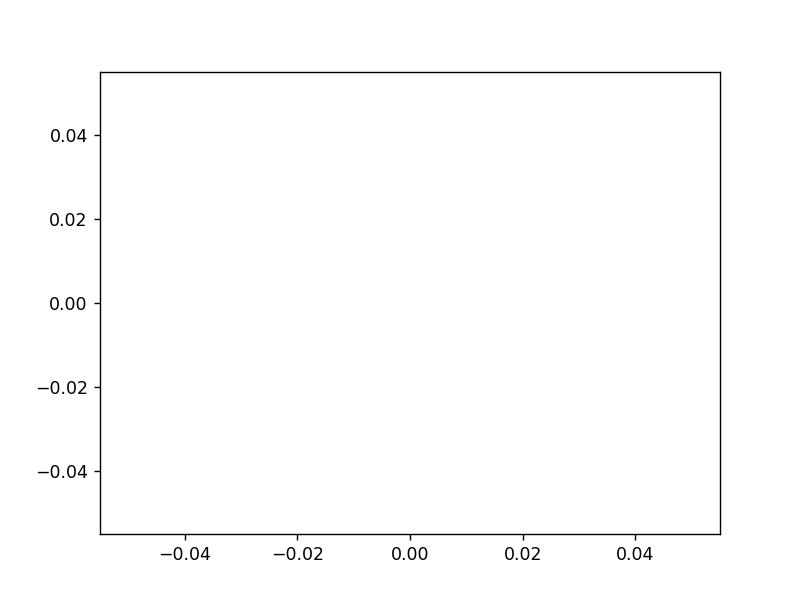

In [75]:
#testy dla wyznacznika wlasneg 2 i 1 epsilon 10^-8
badPoints = compareTwoDeterminers((-1,0),(1,0.1),determiner2,determiner1,10e-8,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

Wyznacznik 1 : na lewo = 399, na linii = 273, na prawo = 328
Wyznacznik 2 : na lewo = 0, na linii = 1000, na prawo = 0
727


<IPython.core.display.Javascript object>


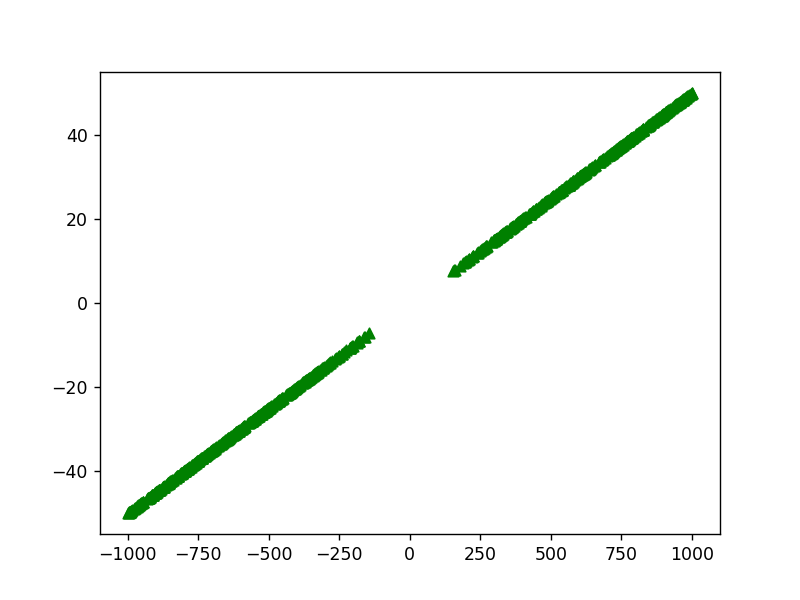

In [76]:
#testy dla wyznacznika wlasneg numpy2 i numpy3 epsilon 10^-14
badPoints = compareTwoDeterminers((-1,0),(1,0.1),npDet2,npDet1,10e-14,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

Wyznacznik 1 : na lewo = 152, na linii = 716, na prawo = 132
Wyznacznik 2 : na lewo = 0, na linii = 1000, na prawo = 0
284


<IPython.core.display.Javascript object>


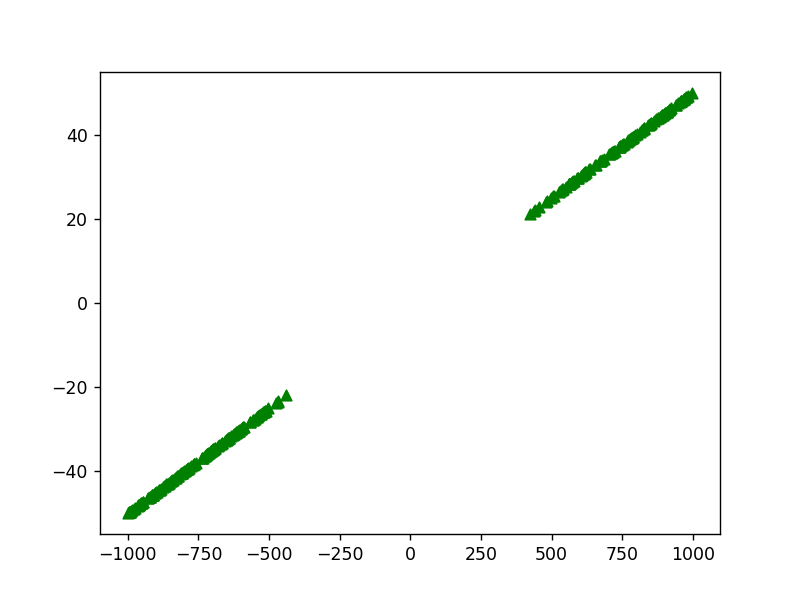

In [81]:
#testy dla wyznacznika wlasneg numpy2 i numpy3 epsilon 10^-13
badPoints = compareTwoDeterminers((-1,0),(1,0.1),npDet2,npDet1,10e-13,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

Wyznacznik 1 : na lewo = 139, na linii = 739, na prawo = 122
Wyznacznik 2 : na lewo = 399, na linii = 273, na prawo = 328
571


<IPython.core.display.Javascript object>


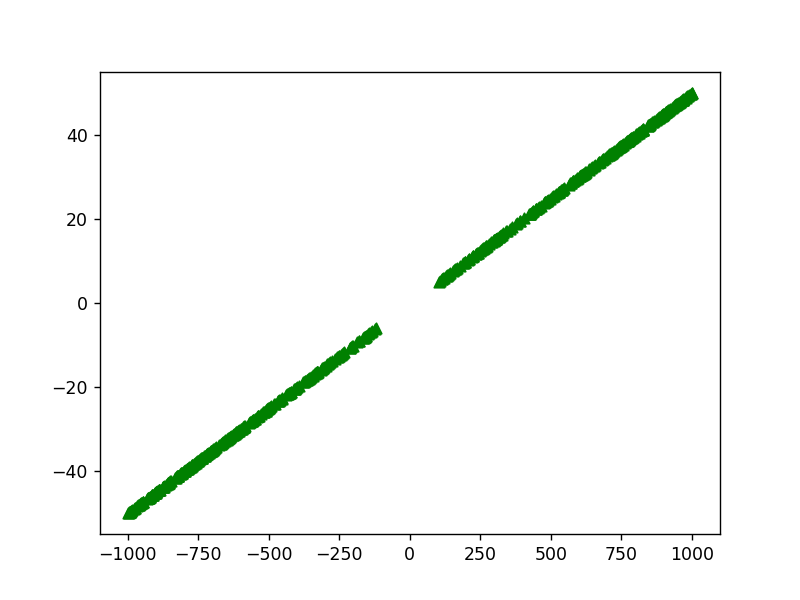

In [82]:
#testy dla wyznacznika wlasneg wlasnego2x2 i numpy2x2 epsilon 10^-14
badPoints = compareTwoDeterminers((-1,0),(1,0.1),determiner2,npDet2,10e-14,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

Wyznacznik 1 : na lewo = 0, na linii = 1000, na prawo = 0
Wyznacznik 2 : na lewo = 0, na linii = 1000, na prawo = 0
0


<IPython.core.display.Javascript object>


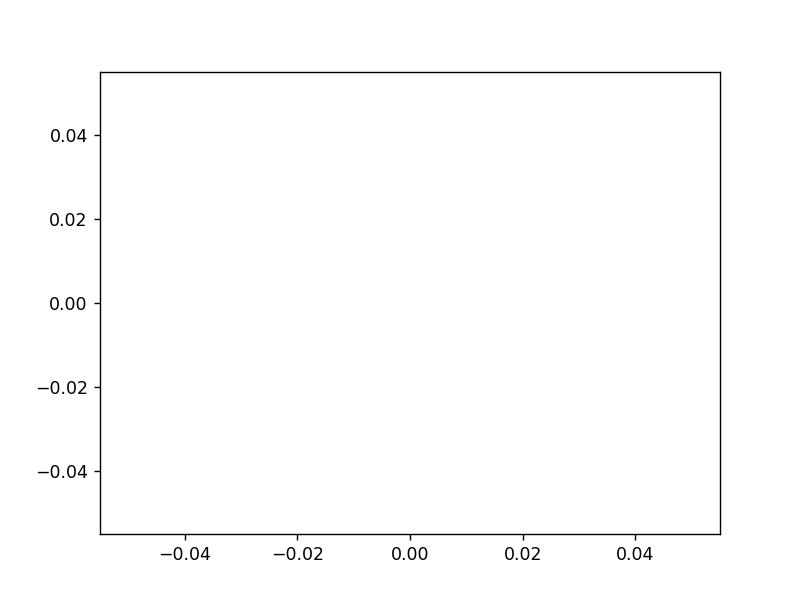

In [83]:
#testy dla wyznacznika wlasneg wlasnego2x2 i numpy2x2 epsilon 10^-12
badPoints = compareTwoDeterminers((-1,0),(1,0.1),determiner2,npDet2,10e-12,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

Wyznacznik 1 : na lewo = 0, na linii = 1000, na prawo = 0
Wyznacznik 2 : na lewo = 0, na linii = 1000, na prawo = 0
0


<IPython.core.display.Javascript object>


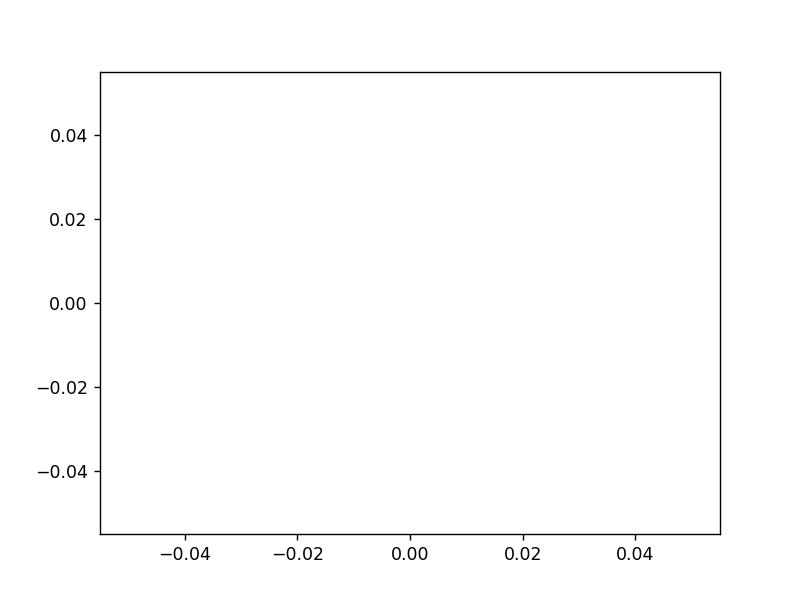

In [84]:
#testy dla wyznacznika wlasneg wlasnego3x3 i numpy3x3 epsilon 10^-14
badPoints = compareTwoDeterminers((-1,0),(1,0.1),determiner1,npDet1,10e-14,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

Wyznacznik 1 : na lewo = 64, na linii = 755, na prawo = 181
Wyznacznik 2 : na lewo = 330, na linii = 269, na prawo = 401
609


<IPython.core.display.Javascript object>


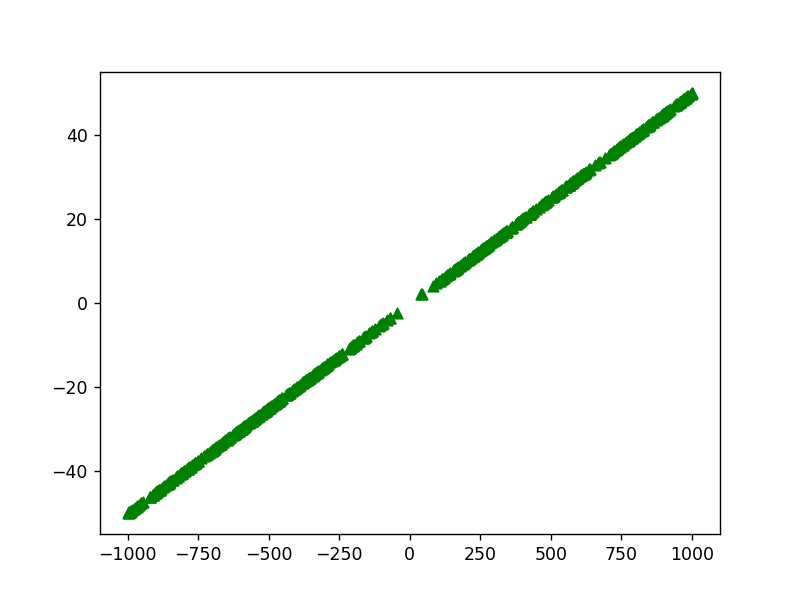

In [86]:
#testy dla wyznacznika wlasneg wlasnego3x3 i numpy3x3 epsilon 10^-16
badPoints = compareTwoDeterminers((-1,0),(1,0.1),determiner1,npDet1,10e-16,points4)

print(len(badPoints))
plotclass = Plot([PointsCollection(badPoints,color = 'green', marker = "^")])
plotclass.draw()

In [ ]:
#jak widać z powyższych testów wyznacznika napisane własnoręcznie sprawowały się często lepiej od wyznaczników numpy